In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/spotify-2023.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
X = df[['danceability_%', 'valence_%', 'energy_%','acousticness_%']] #, 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [6]:
y = df['in_spotify_playlists']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [9]:
X.shape

(953, 4)

In [10]:
X_train.shape

(762, 4)

In [11]:
X_test.shape

(191, 4)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([-74.3649582 ,  15.41107341,   6.72552175, -20.77801621])

In [16]:
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_pred, y_test)

57975600.46607442

In [19]:
lr.score(X_test, y_test) 

#R2: Comparison of a constant prediction vs current model. 
# R2 is between 0 and 1, best possible result is 1. 
# Negative R2 => worse than a constant prediction.

0.025495408362182115

## EXERCISE

- Try KNeighborsRegressor (in sklearn.neighbors) with different values of n_neighbors. Can we find a better model?
- Challenge: Try to do it in a loop.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
num_neighbors = range(3,100)
scores = []
for n in num_neighbors:
    knn = KNeighborsRegressor(n_neighbors=n, metric='cosine')
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'R2 error')

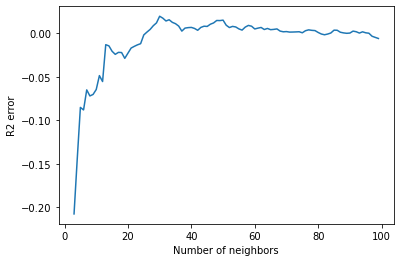

In [23]:
plt.plot(num_neighbors,scores)
plt.xlabel('Number of neighbors')
plt.ylabel('R2 error')

In [24]:
scores[27:35]

[0.019758790574138985,
 0.017562192484084305,
 0.014324614299127791,
 0.015718282712635867,
 0.012746810914101347,
 0.011206609316458671,
 0.008470747025840275,
 0.0026810173618380118]

array([[<AxesSubplot:title={'center':'danceability_%'}>,
        <AxesSubplot:title={'center':'valence_%'}>],
       [<AxesSubplot:title={'center':'energy_%'}>,
        <AxesSubplot:title={'center':'acousticness_%'}>]], dtype=object)

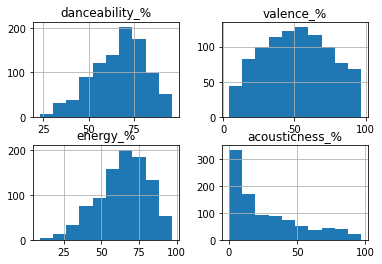

In [25]:
X.hist()

## Learning curve

In [26]:
from sklearn.model_selection import learning_curve

In [27]:
knn = KNeighborsRegressor(n_neighbors=10)

In [28]:
train_size, train_scores, test_scores = learning_curve(knn, X_train, y_train)

In [29]:
avg_train_scores = train_scores.mean(axis=1)
avg_test_scores = test_scores.mean(axis=1)

Text(0, 0.5, 'Model score')

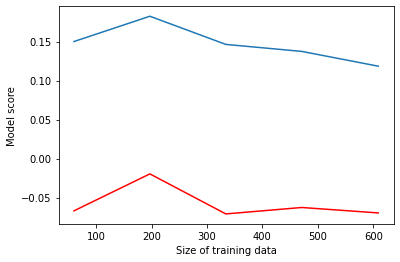

In [30]:
plt.plot(train_size, avg_train_scores)
plt.plot(train_size, avg_test_scores, 'r')
plt.xlabel('Size of training data')
plt.ylabel('Model score')

**Note:** We see that the training score shown in blue above is quite low (R2 should be close to 1 for a model to be acceptable). There is also a gap between the training and testing score (shown in red). This gap means that we would need to add more data, as it has not enough variance to assign the correct labels.

In [32]:
train_scores

array([[0.2325138 , 0.1294286 , 0.1294286 , 0.1294286 , 0.1294286 ],
       [0.12675727, 0.14880027, 0.21228913, 0.21228913, 0.21228913],
       [0.08206706, 0.14200267, 0.18348675, 0.16216482, 0.16216482],
       [0.11232965, 0.12924131, 0.15119529, 0.14859335, 0.14565477],
       [0.10778776, 0.10705965, 0.13717289, 0.1128416 , 0.12739146]])

In [33]:
avg_train_scores

array([0.15004564, 0.18248498, 0.14637722, 0.13740287, 0.11845067])

In [34]:
train_scores[0]

array([0.2325138, 0.1294286, 0.1294286, 0.1294286, 0.1294286])

The scores in the above vector represent the following:
- Consider 10% of the training data
- Split that 10% in five parts. 
- Run the training process in 4 of the 5 parts, evaluate in the 1 remaining part.

In [ ]:
train_scores

In [36]:
X.corr()

,danceability_%,valence_%,energy_%,acousticness_%
danceability_%,1.000000,0.408451,0.198095,-0.236165
valence_%,0.408451,1.000000,0.357612,-0.081907
energy_%,0.198095,0.357612,1.000000,-0.577344
acousticness_%,-0.236165,-0.081907,-0.577344,1.000000
